In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
LDAP = pd.read_csv('/content/drive/My Drive/DDos_Dataset/LDAP11.csv')
Portmap = pd.read_csv('/content/drive/My Drive/DDos_Dataset/Portmap1.csv')
UDPLag=pd.read_csv('/content/drive/My Drive/DDos_Dataset/UDPLag11.csv')
data = pd.concat([LDAP,Portmap,UDPLag], ignore_index = True)


In [ ]:

data.head(5)

In [ ]:
data.columns

In [ ]:
data.shape

(15000, 38)

In [ ]:
data.describe()

,Unnamed: 0,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Bwd Packets/s,Total Fwd Packets,...,Fwd Packet Length Mean,Flow Bytes/s,Max Packet Length,Protocol.1,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets.1,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd
count,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,15000.000000,...,15000.000000,1.499800e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,128270.938267,5.416747e+06,5.677884e+04,9.356241e+06,7.615474e+05,1.559986e+06,4.550104e+06,1.297267,4.228639e+03,10.219400,...,157.805400,1.241995e+08,366.352067,10.472533,3.284016e+05,3.326302e+05,880.637867,880.637867,18349.015533,6.371267
std,159477.823519,1.303250e+07,1.206210e+06,2.672721e+07,2.356781e+06,4.580719e+06,1.326606e+07,3.711094,5.434819e+04,226.918144,...,288.262323,3.830021e+08,673.990813,5.487032,5.668697e+05,5.699931e+05,3484.242497,3484.242497,22985.496829,155.304580
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,...,0.000000,-1.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1168.000000,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.000000,...,6.000000,1.104596e+02,6.000000,6.000000,2.841260e+00,6.345636e+00,24.000000,24.000000,80.000000,1.000000
50%,71465.500000,3.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000,2.375712e-01,2.000000,...,32.250000,1.244525e+04,58.500000,6.000000,9.632519e+01,1.926272e+02,78.000000,78.000000,443.000000,1.000000
75%,177065.000000,2.058458e+05,3.000000e+00,4.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,2.000000,9.421963e+01,6.000000,...,169.666670,3.700000e+07,380.000000,17.000000,6.666667e+05,6.666667e+05,760.000000,760.000000,39872.250000,3.000000
max,610831.000000,1.097105e+08,4.915212e+07,1.199473e+08,3.440100e+07,5.958428e+07,1.032030e+08,96.000000,2.000000e+06,20444.000000,...,2131.000000,2.944000e+09,3617.000000,17.000000,3.000000e+06,3.000000e+06,188320.000000,188320.000000,65519.000000,18766.000000


In [ ]:

# Drop Unnamed:0
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:

#Detect null values
data_real = data.replace(np.inf, np.nan)
data_real.isnull().sum().sum()
data_ = data_real.dropna(axis=0)
data_.isnull().sum().sum()

0

In [ ]:

data[' Label'].value_counts()

 Label
BENIGN     9196
UDPLag     1873
Syn        1771
Portmap    1293
LDAP        406
UDP         333
NetBIOS     128
Name: count, dtype: int64

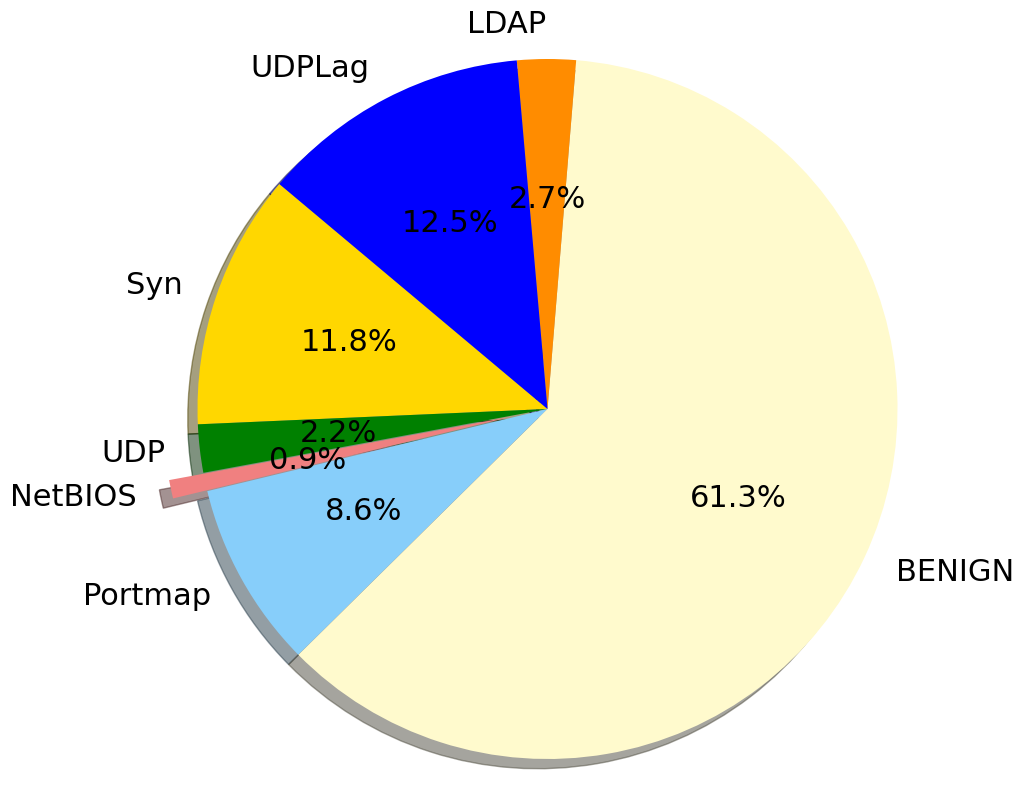

In [ ]:
labels = 'Syn', 'UDP', 'NetBIOS','Portmap','BENIGN','LDAP','UDPLag'
sizes = [ len(data_[data_[' Label']=='Syn']),
         len(data_[data_[' Label']=='UDP']), len(data_[data_[' Label']=='NetBIOS']),
         len(data_[data_[' Label']=='Portmap']),
         len(data_[data_[' Label']=='BENIGN']),len(data_[data_[' Label']=='LDAP']),len(data_[data_[' Label']=='UDPLag'])]
colors = ['gold', 'green', 'lightcoral', 'lightskyblue','lemonchiffon','darkorange','blue']
explode = ( 0, 0, 0.1,0,0,0,0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


Text(0, 0.5, ' Flow Packets/s')

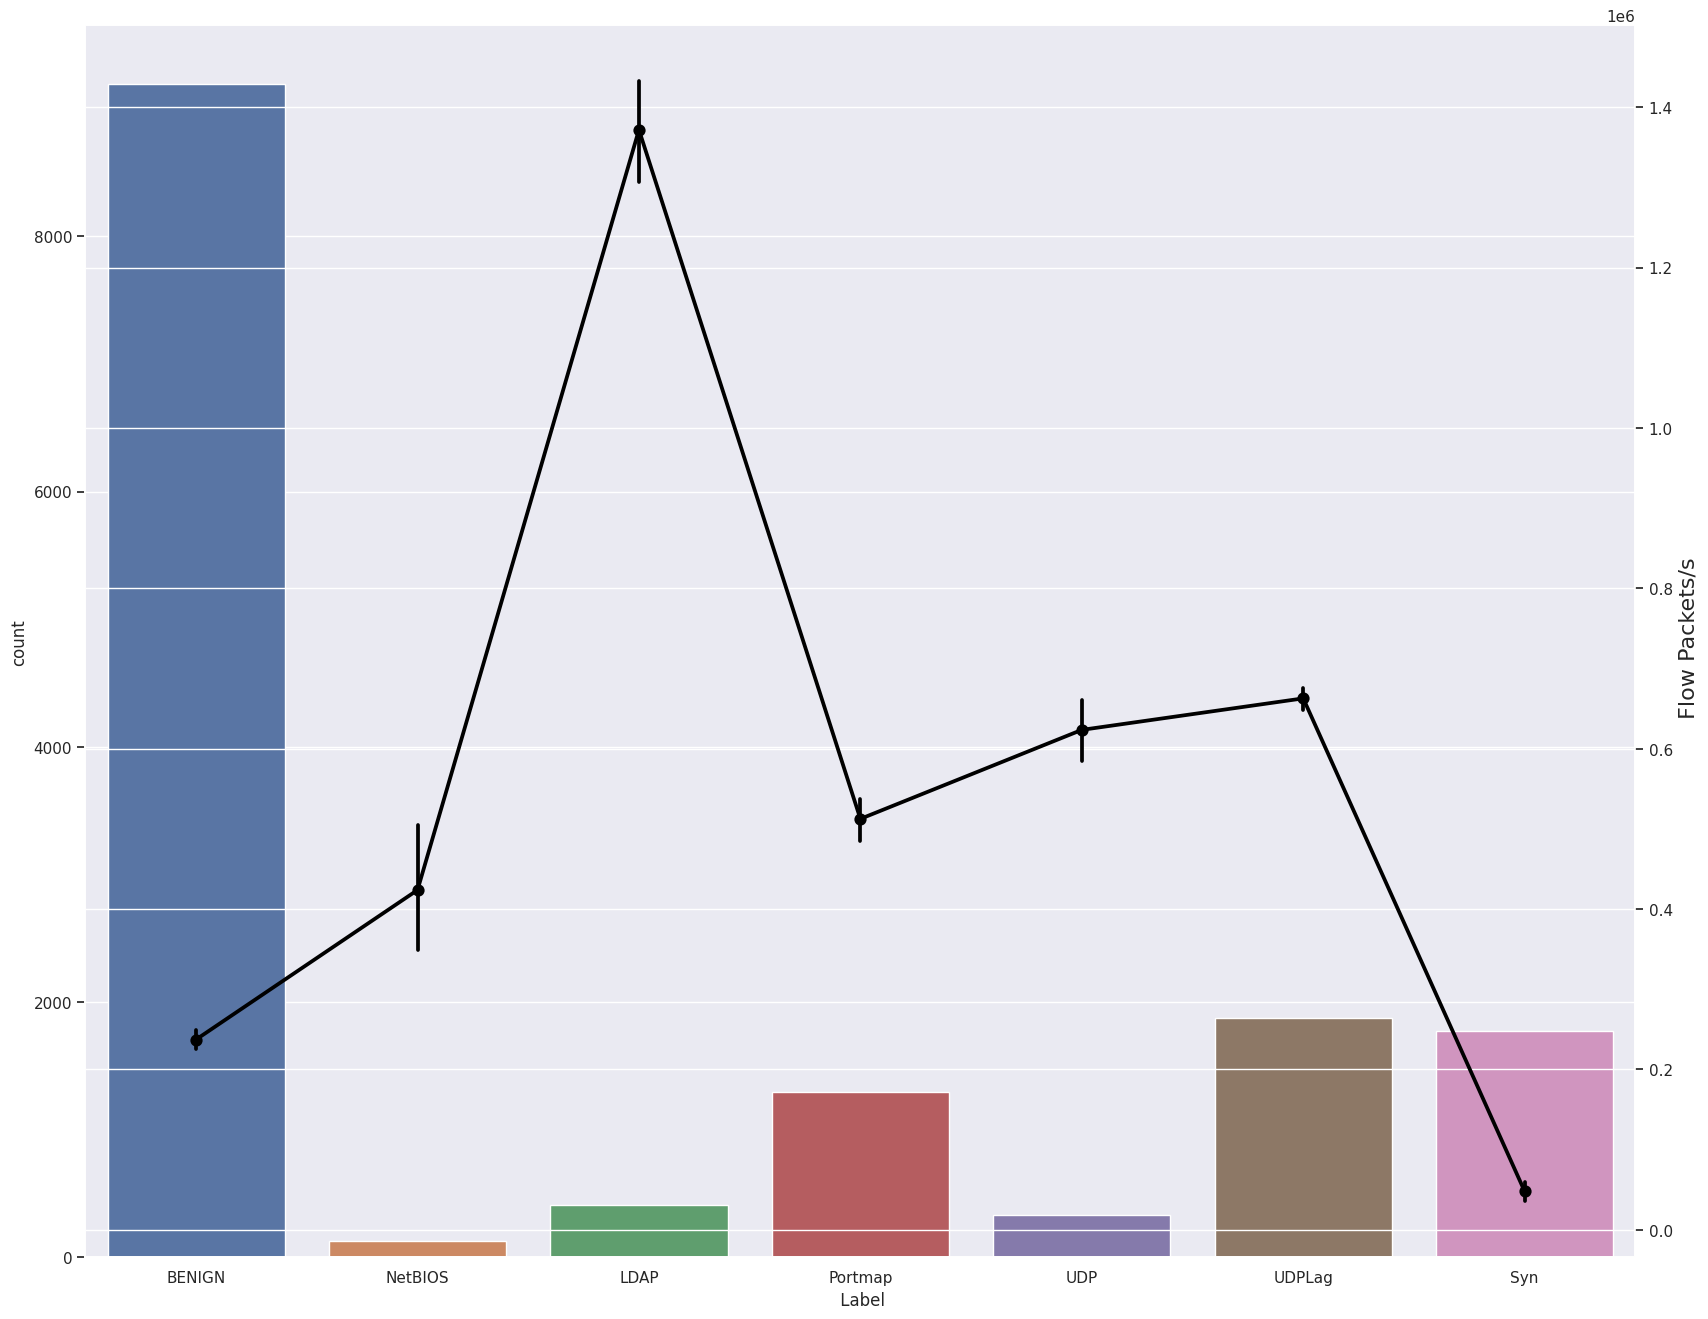

In [ ]:
plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y=' Flow Packets/s', x=' Label', data=data_, color='black')
gt.set_ylabel(" Flow Packets/s", fontsize=16)

In [ ]:

df = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]

df = pd.DataFrame(data,columns=[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd'])
corrMatrix = df.corr()
print (corrMatrix)

                               Bwd Packets/s   Total Fwd Packets  \
 Bwd Packets/s                      1.000000           -0.002335   
 Total Fwd Packets                 -0.002335            1.000000   
Total Length of Fwd Packets        -0.018677            0.244058   
 Flow Duration                     -0.036880            0.041612   
 Total Length of Bwd Packets       -0.000194            0.743909   
 Total Backward Packets            -0.000914            0.745387   
 Protocol                          -0.062849           -0.035403   
 Inbound                            0.079972           -0.008445   
 Min Packet Length                 -0.035865           -0.016818   
 Fwd Packet Length Min             -0.031282           -0.016890   
 Packet Length Mean                -0.043899            0.027219   
 Fwd Packet Length Max             -0.039264            0.030065   
 Average Packet Size               -0.041933            0.013146   
 ACK Flag Count                    -0.032443    

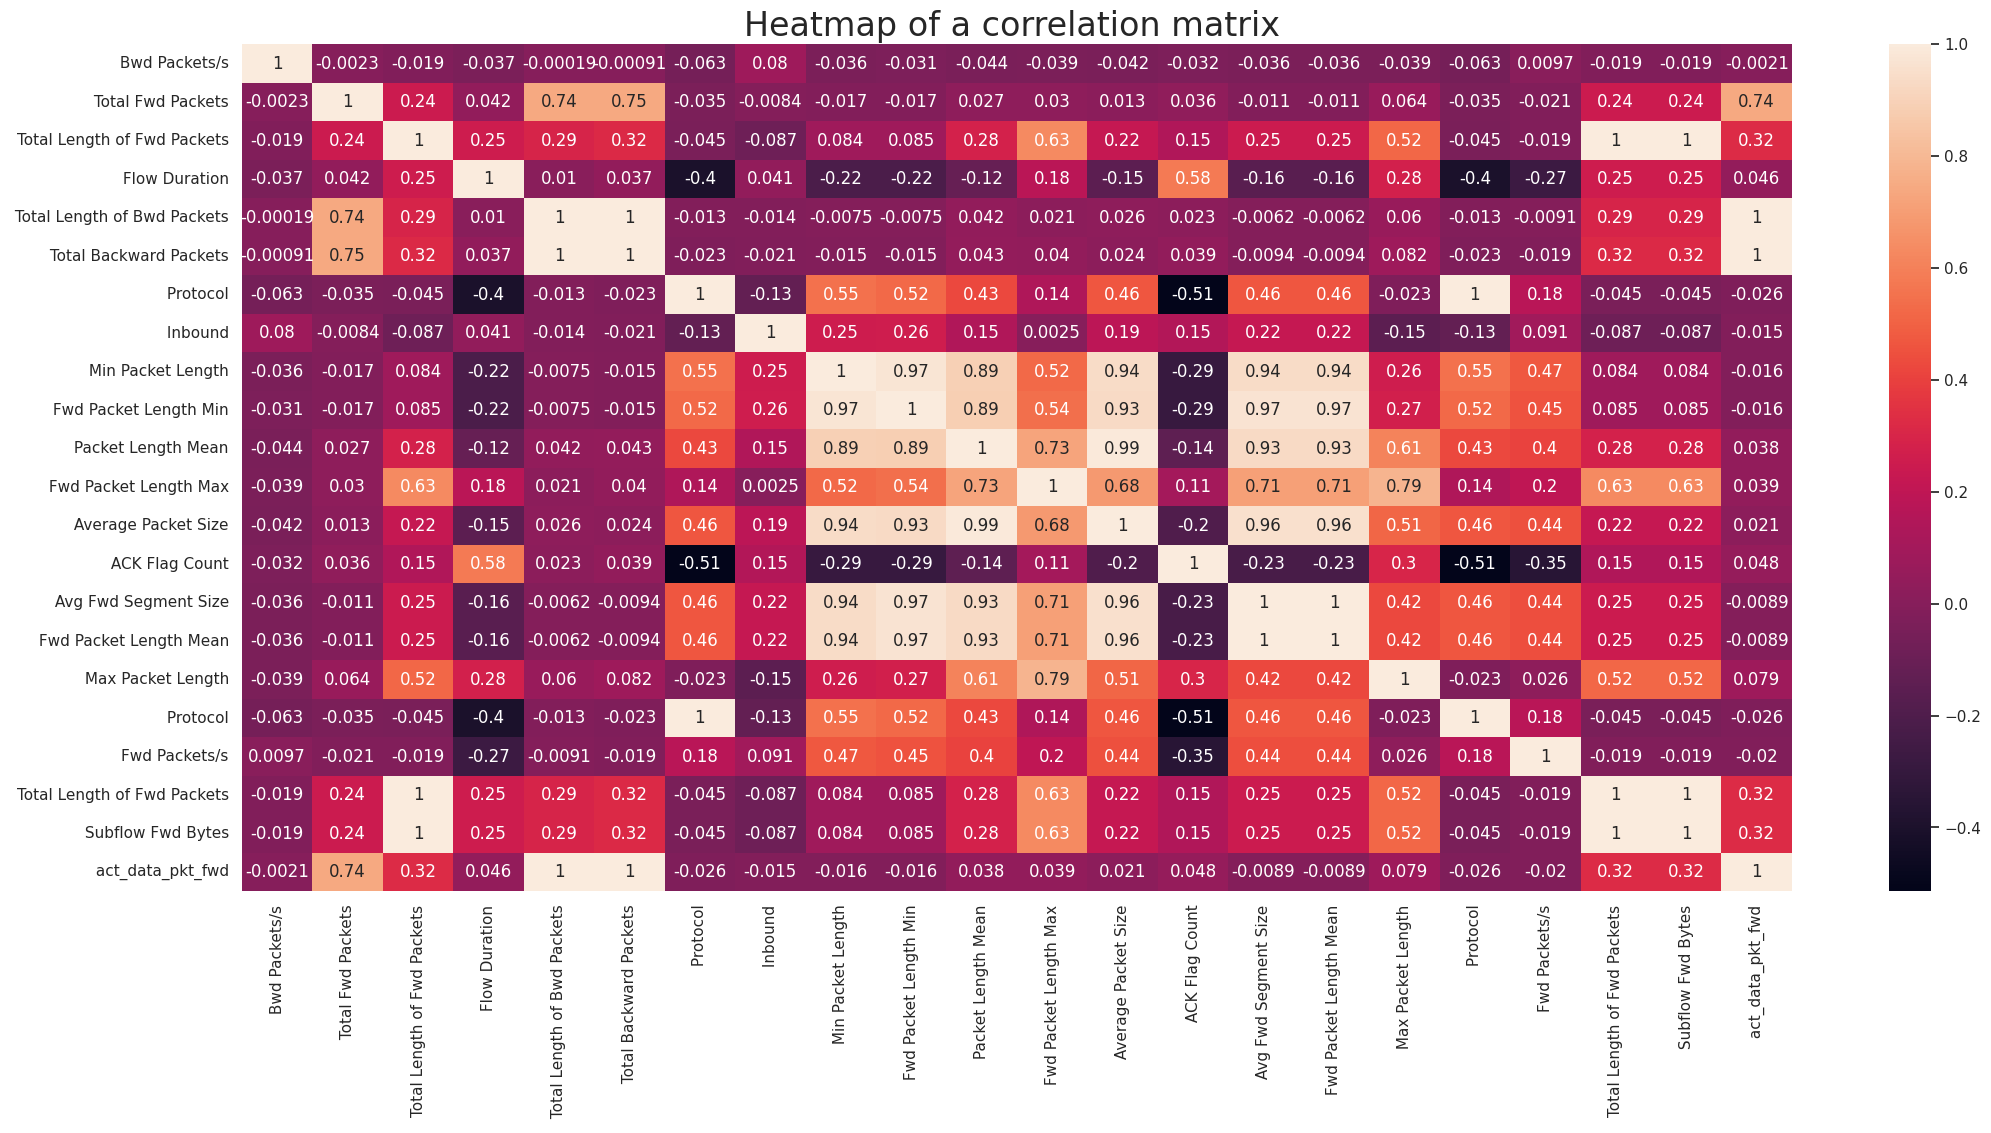

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize =(25,11))
plt.title('Heatmap of a correlation matrix ', fontsize=24);


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

Text(0, 0.5, 'Flow Bytes/s')

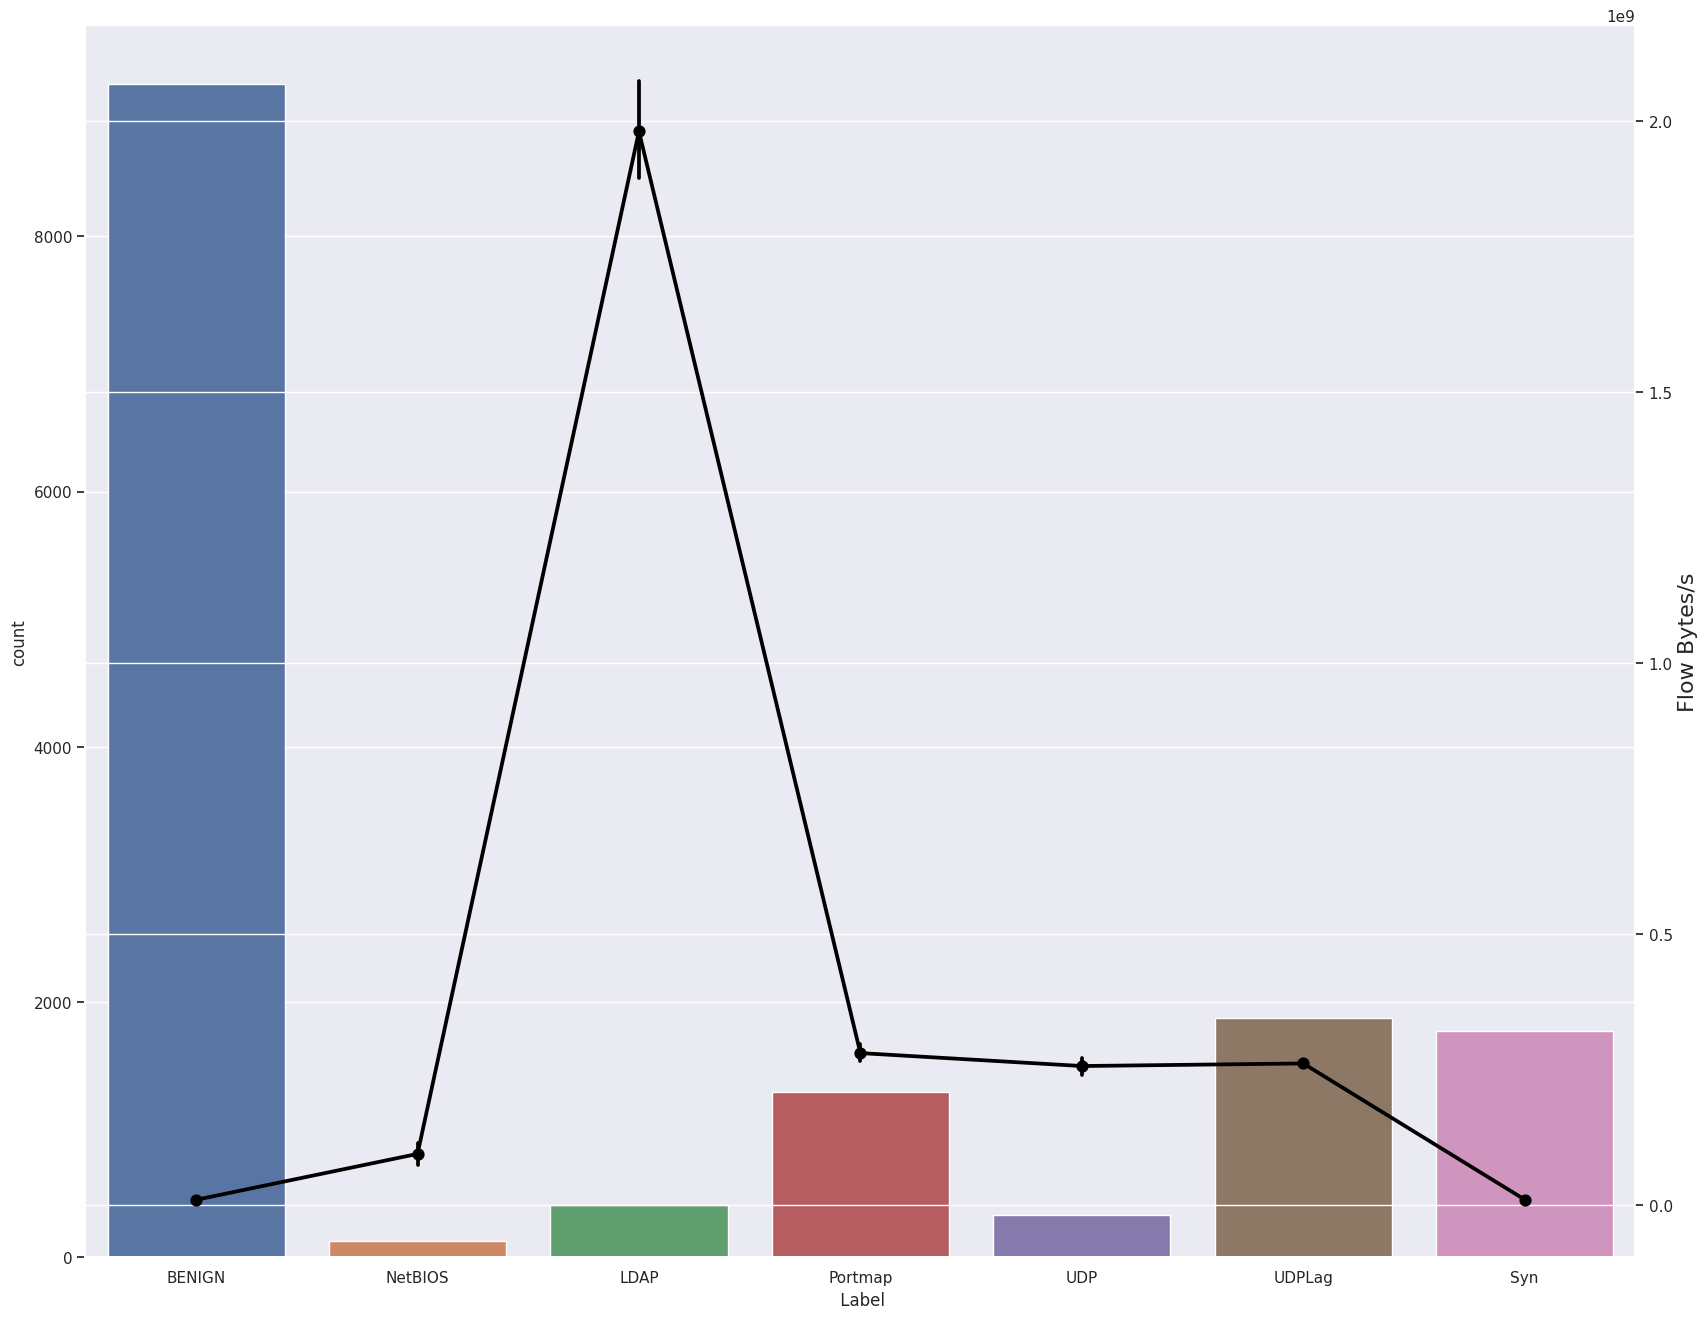

In [ ]:
plt.figure(figsize=(20,16))
sns.set(style="darkgrid")
g1 = sns.countplot(x=' Label', hue=' Label', data=data_)
gt = g1.twinx()
gt = sns.pointplot(y='Flow Bytes/s', x=' Label', data=data_, color='black')
gt.set_ylabel("Flow Bytes/s", fontsize=16)


<ipython-input-18-5b7a1c64b2f3>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)


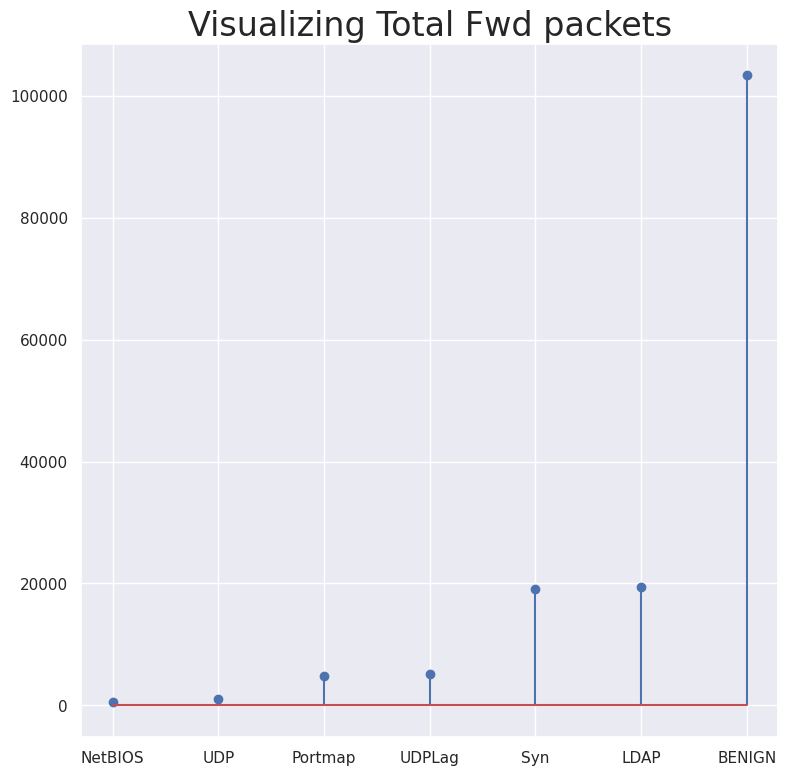

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sns.set(style="darkgrid")
plt.figure(figsize=(9,9))
result = data_.groupby([" Label"])[' Total Fwd Packets'].sum().reset_index().sort_values(' Total Fwd Packets')
plt.stem(result[' Label'],result[' Total Fwd Packets'], use_line_collection = True)

plt.title('Visualizing Total Fwd packets', fontsize=24);
plt.show()


<ipython-input-19-e47481109223>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


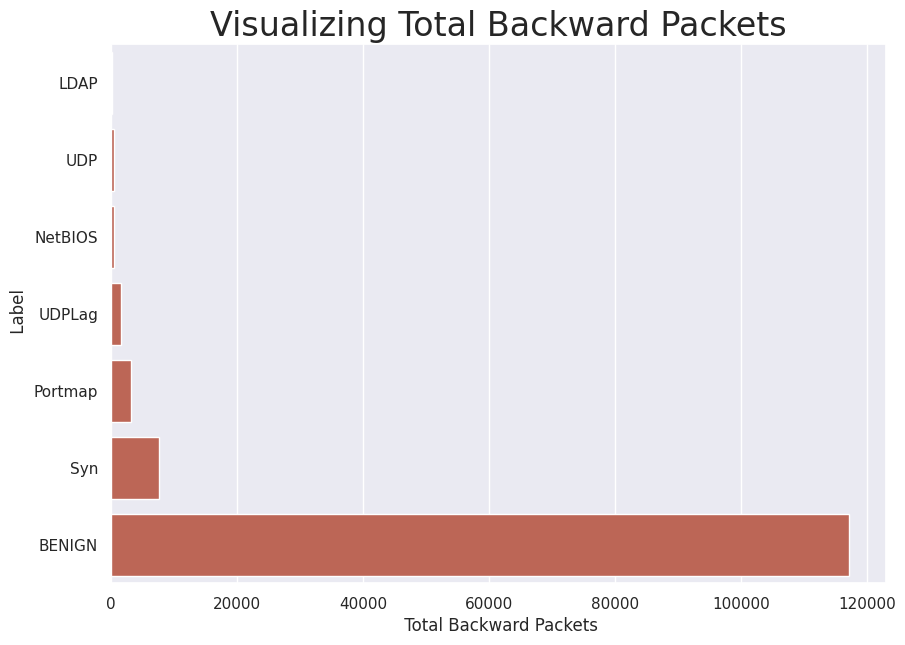

In [ ]:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
df1=data_[[' Label',' Total Backward Packets']]
result1 = df1.groupby([" Label"])[' Total Backward Packets'].sum().reset_index().sort_values(' Total Backward Packets')
plt.title('Visualizing Total Backward Packets', fontsize=24);

sns.barplot(
    x=" Total Backward Packets",
    y=" Label",
    data=result1,
    estimator=sum,
    ci=None,
    color='#CD5B45');

Text(0, 0.5, ' Protocol')

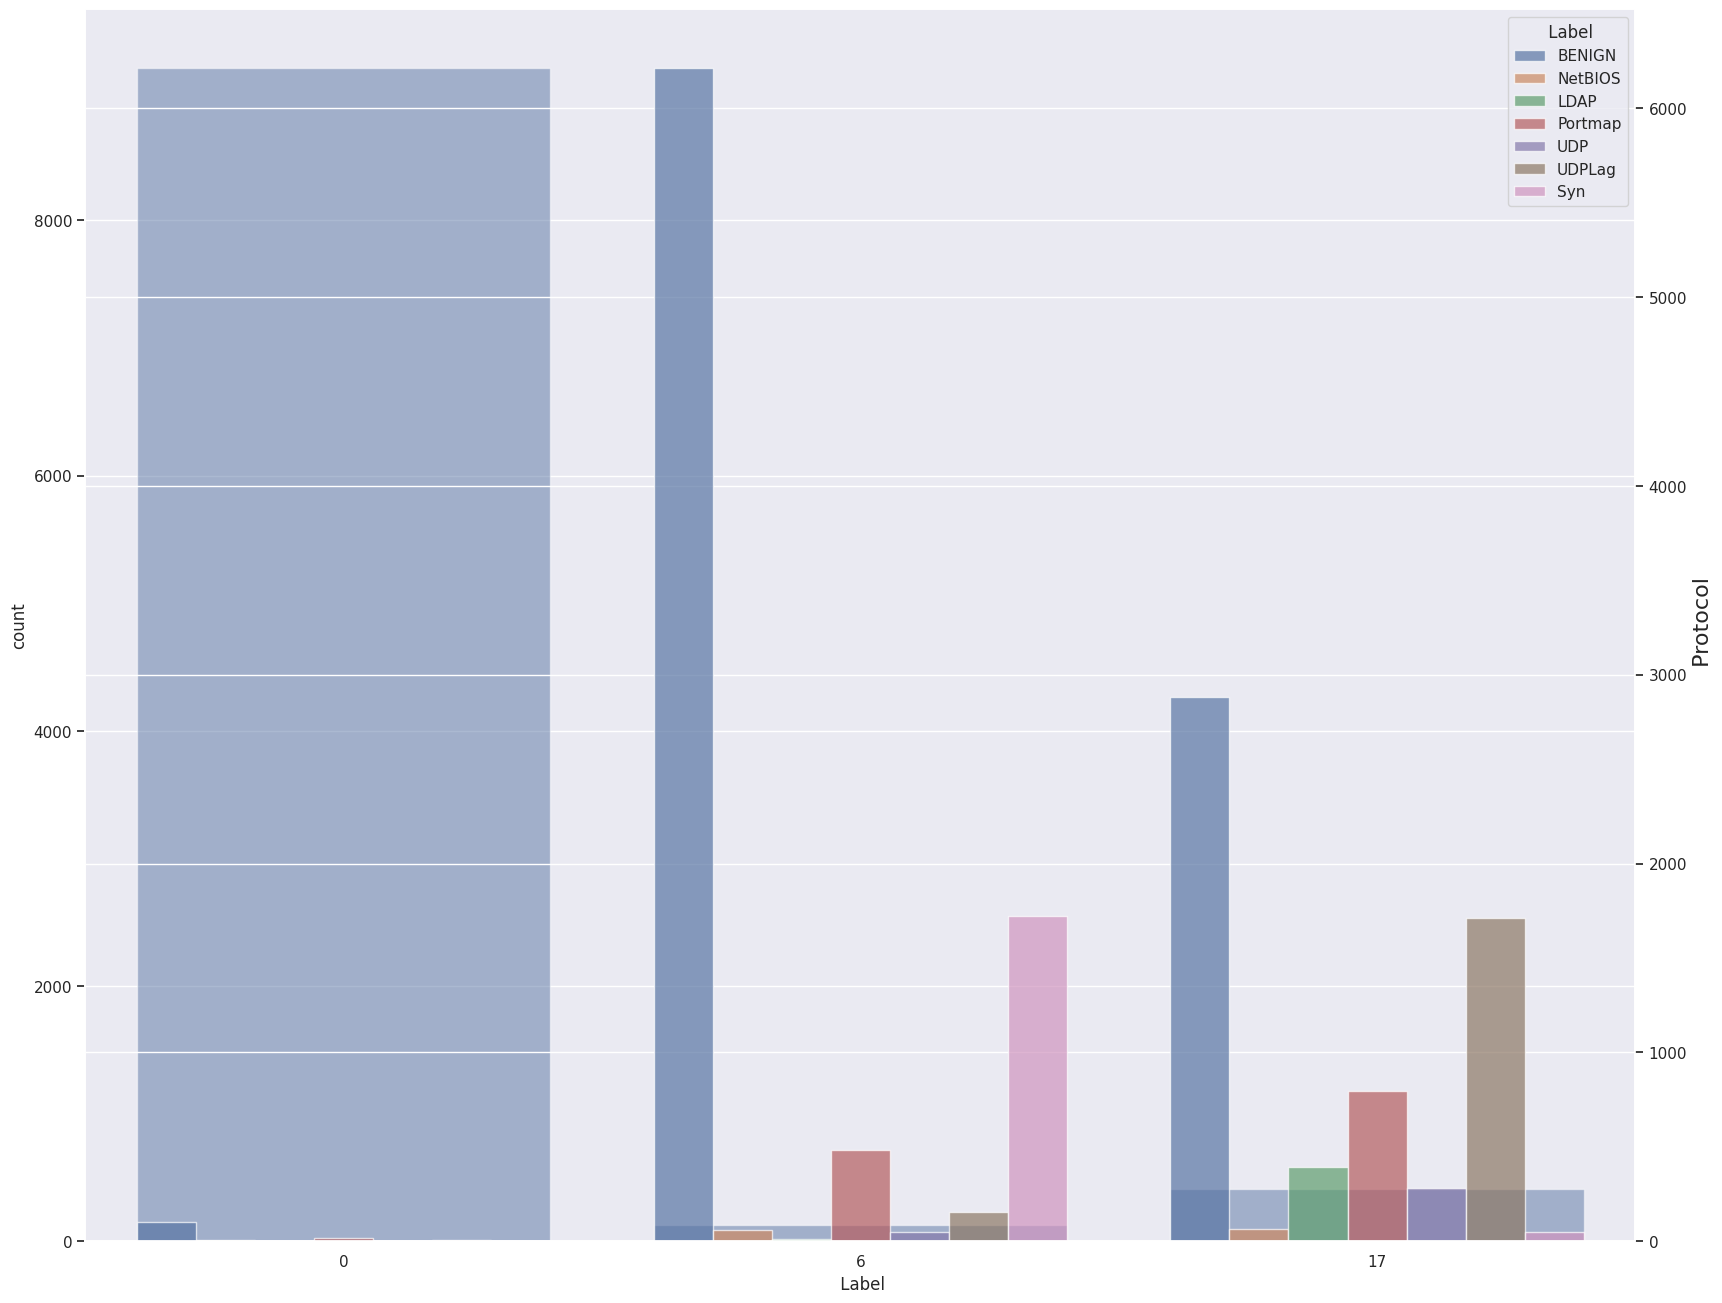

In [ ]:

plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

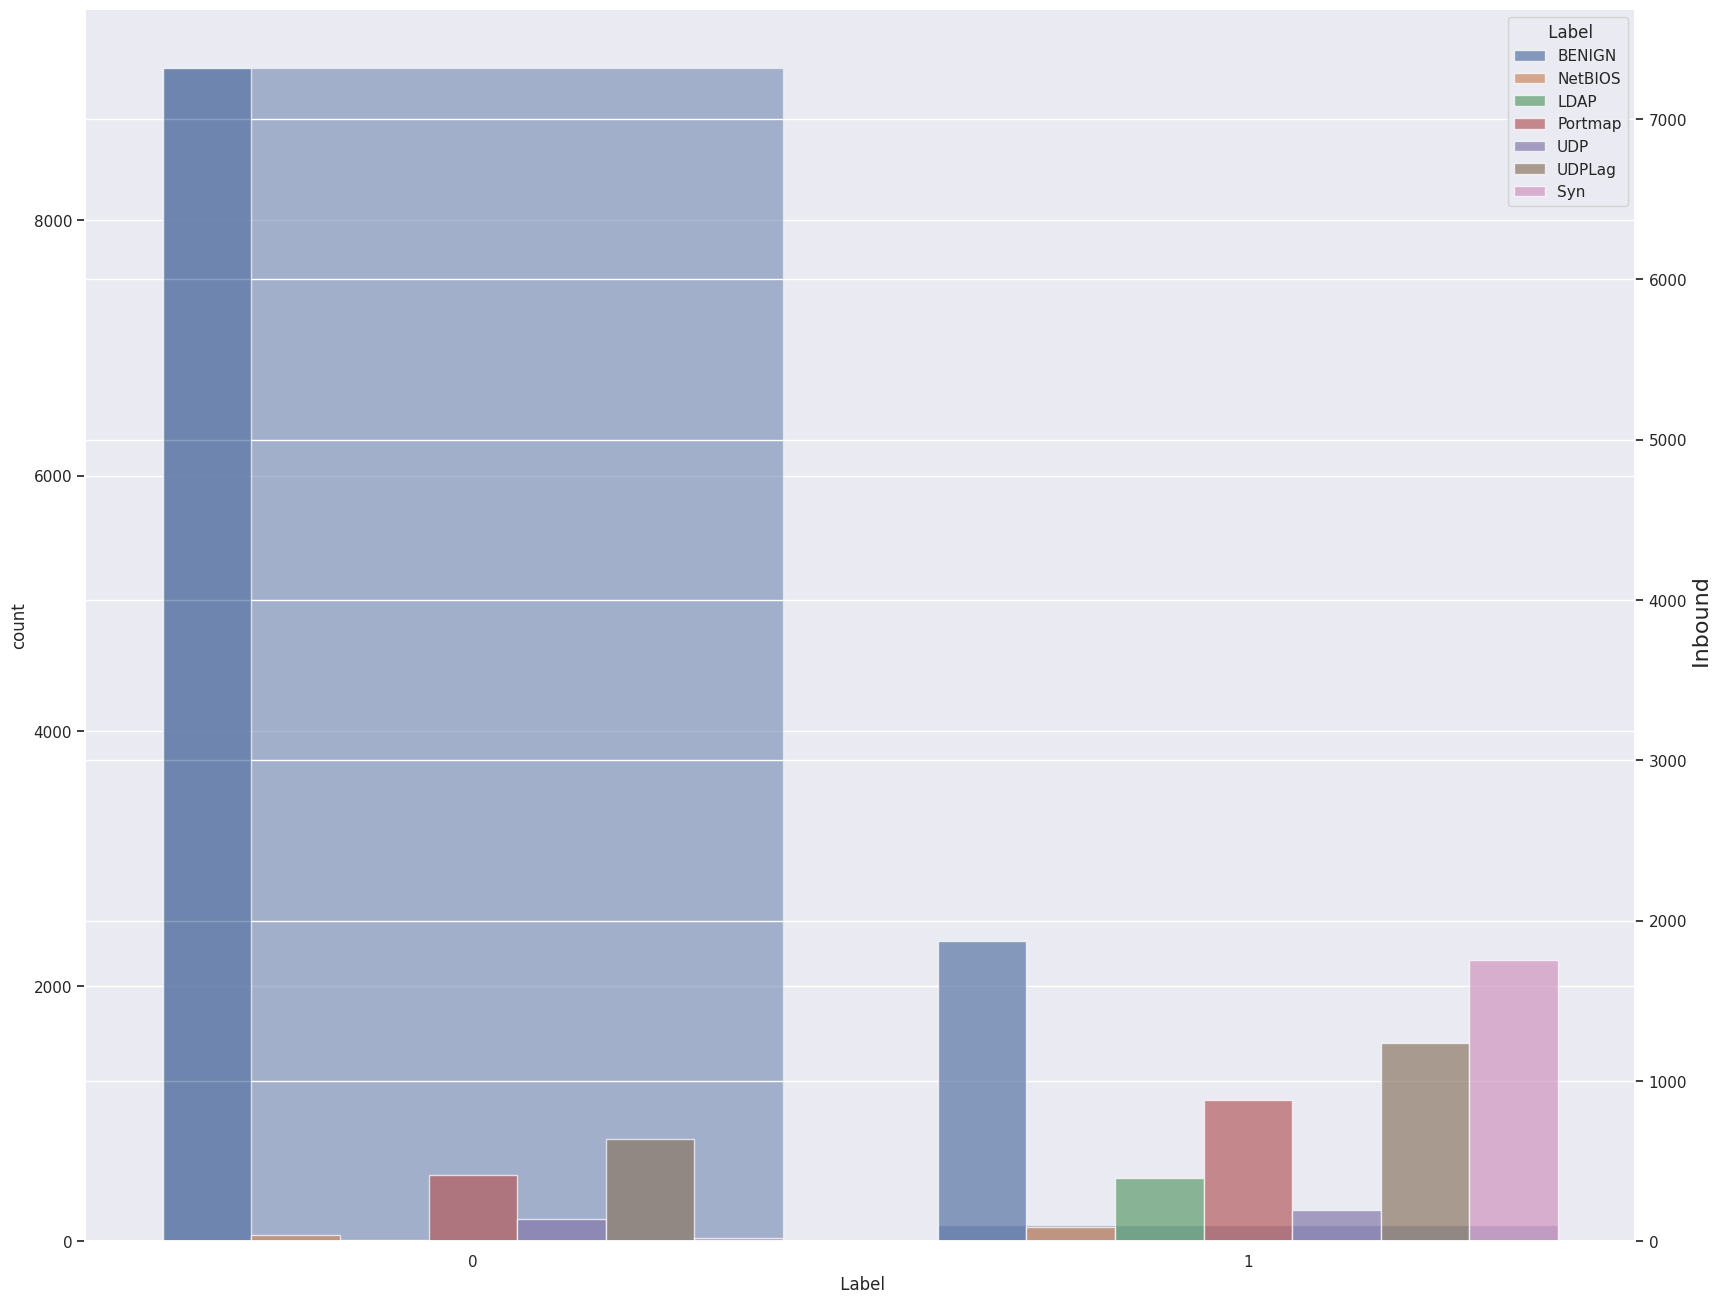

In [ ]:

plt.figure(figsize=(20,16))
g1 = sns.countplot(x=' Label', data=data_,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue=' Label',alpha=0.7, data=data_)
gt.set_ylabel(' Inbound', fontsize=16)

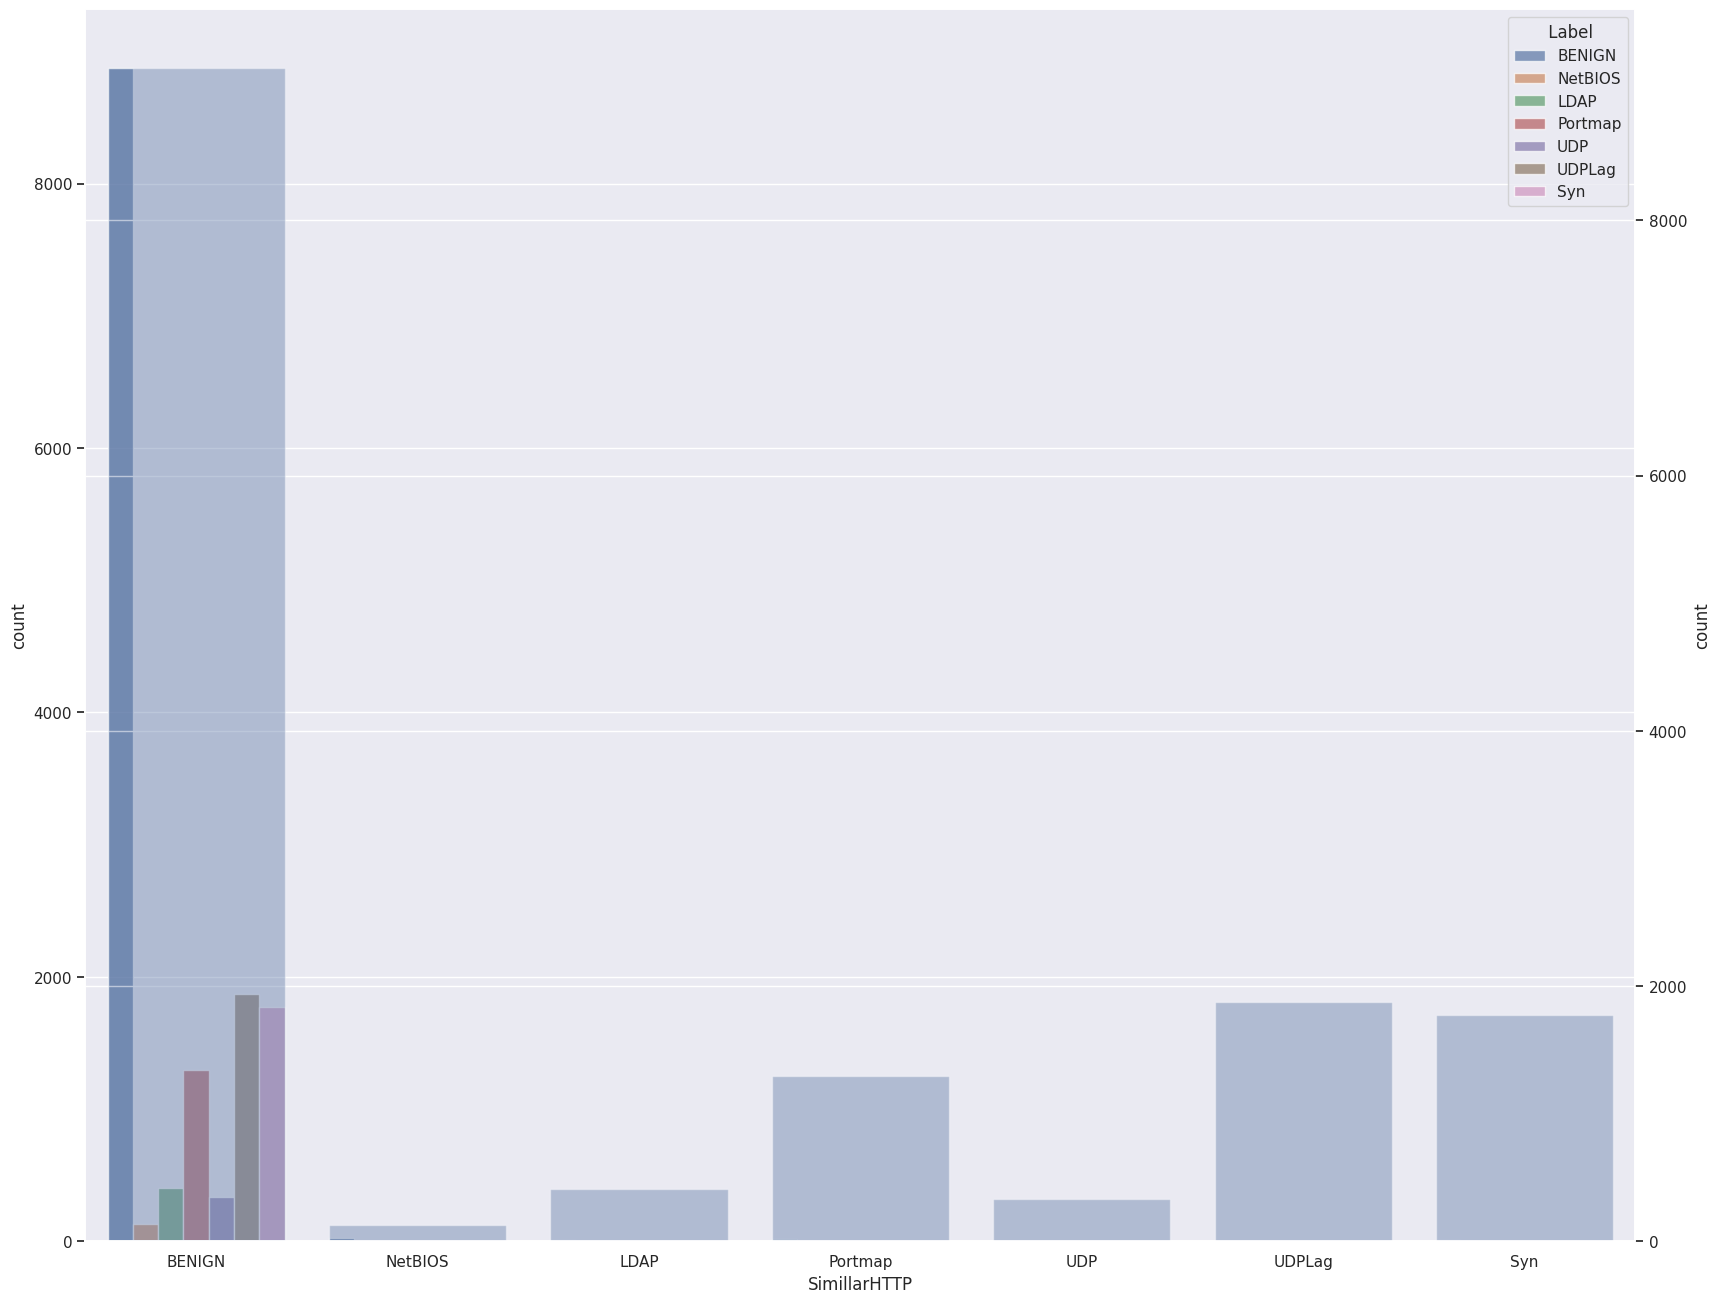

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x='SimillarHTTP', hue=' Label',alpha=0.7, data=data_)
gt = g1.twinx()
gt = sns.countplot(x=' Label', data=data_,alpha=0.4)

In [ ]:


df2 = data_[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Total Length of Bwd Packets',' Total Backward Packets',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]
df2.dtypes

 Bwd Packets/s                  float64
 Total Fwd Packets                int64
Total Length of Fwd Packets       int64
 Flow Duration                    int64
 Total Length of Bwd Packets      int64
 Total Backward Packets           int64
 Protocol                         int64
 Inbound                          int64
 Min Packet Length                int64
 Fwd Packet Length Min            int64
 Packet Length Mean             float64
 Fwd Packet Length Max            int64
 Average Packet Size            float64
 ACK Flag Count                   int64
 Avg Fwd Segment Size           float64
 Fwd Packet Length Mean         float64
 Max Packet Length                int64
 Protocol                         int64
Fwd Packets/s                   float64
Total Length of Fwd Packets       int64
 Subflow Fwd Bytes                int64
 act_data_pkt_fwd                 int64
dtype: object

In [ ]:
scale = preprocessing.StandardScaler()
X = scale.fit_transform(df2)
X_norm = preprocessing.normalize(X)

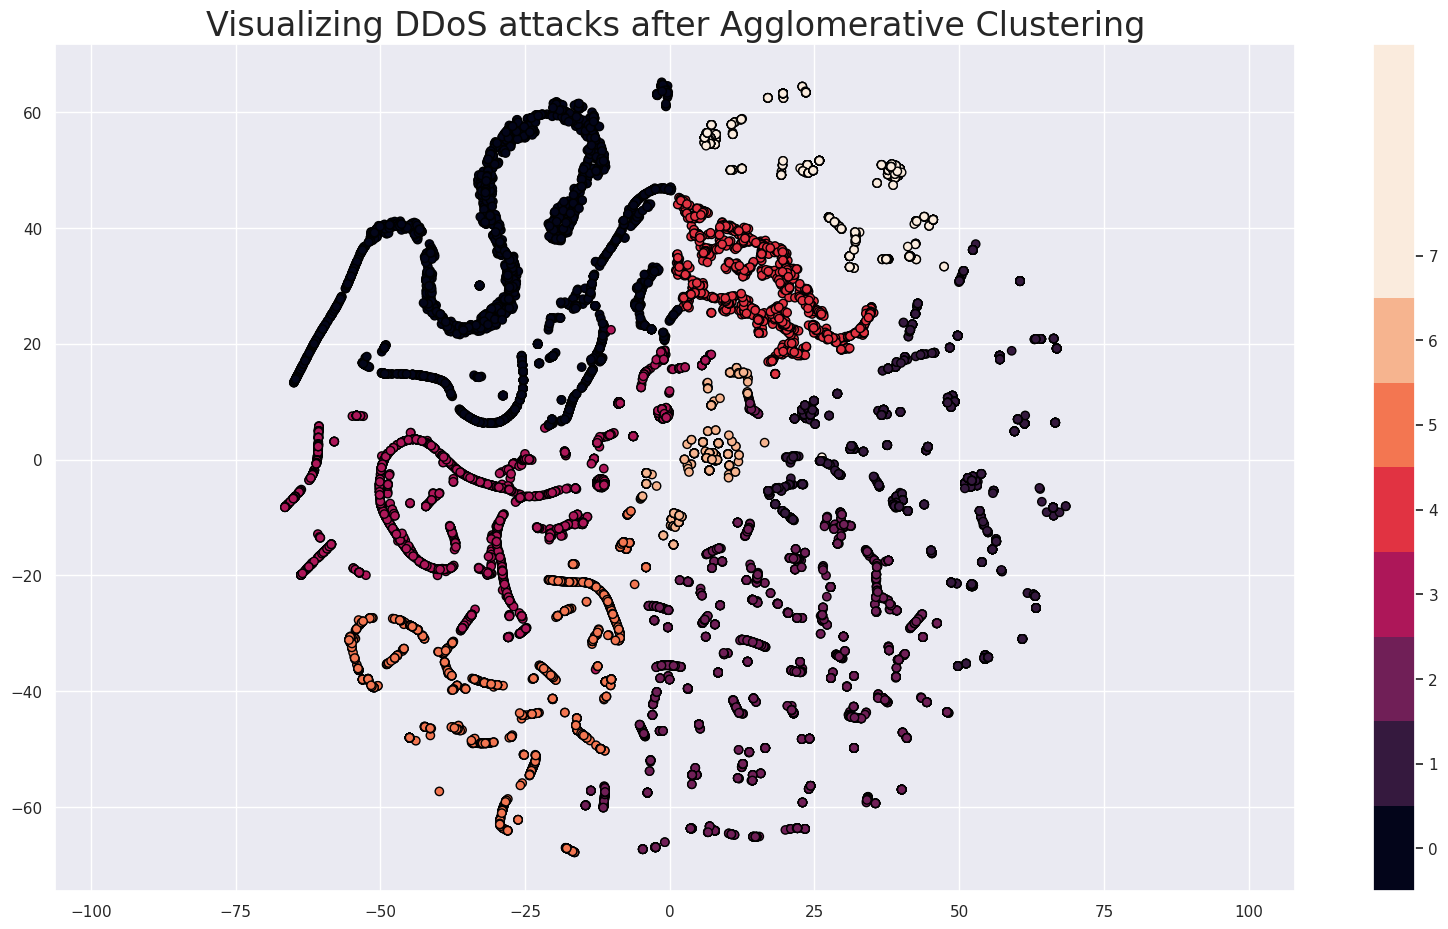

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_norm)
Agglo = AgglomerativeClustering(n_clusters=8)
Agglo.fit(principalComponents)
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerative Clustering', fontsize=24);
plt.show()


In [ ]:
data_X = data_.drop([' Label','SimillarHTTP'], axis = 1)


In [ ]:
data_X.shape


(14998, 35)

In [ ]:
data_y = data_[' Label']

In [ ]:

data_y.shape

(14998,)

In [ ]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)


In [ ]:

data_y_trans

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:

le_fid = LabelEncoder()
le_fid.fit(data_X['Flow ID'])
data_X['Flow ID'] = le_fid.fit_transform(data_X['Flow ID'])

In [ ]:
le_timestamp = LabelEncoder()
le_timestamp.fit(data_X[' Timestamp'])
data_X[' Timestamp'] = le_timestamp.fit_transform(data_X[' Timestamp'])


In [ ]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)


ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([0.01615847, 0.00288346, 0.00754073, 0.00480364, 0.00439745,
       0.00589336, 0.00184655, 0.00684927, 0.00789361, 0.01118142,
       0.04088121, 0.00178303, 0.00239465, 0.02717739, 0.08269893,
       0.1127396 , 0.03330022, 0.06753121, 0.05341615, 0.11693218,
       0.02388207, 0.02439073, 0.03553393, 0.06223284, 0.03734076,
       0.03822838, 0.02284289, 0.02257587, 0.02266914, 0.01742647,
       0.01317068, 0.0145451 , 0.00920886, 0.0369491 , 0.01070065])

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

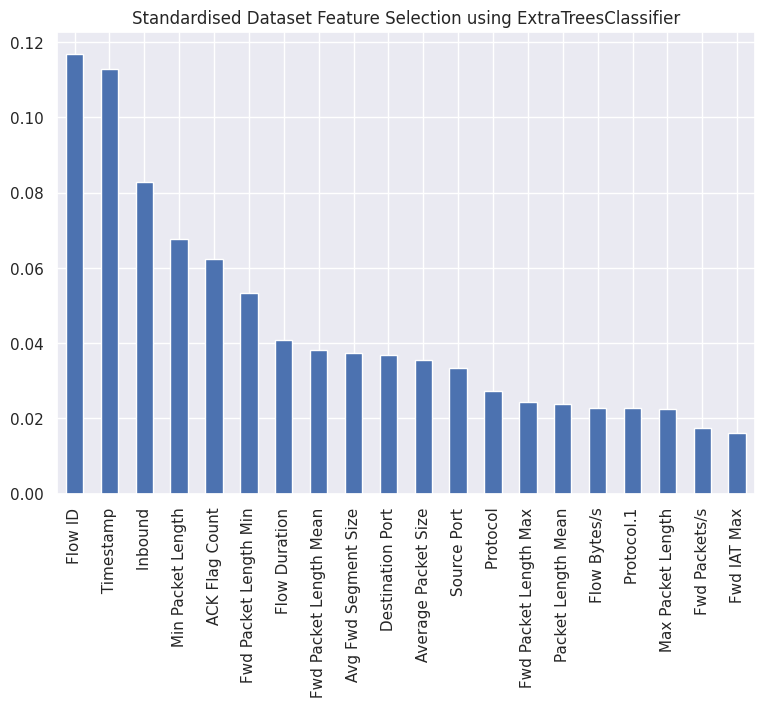

In [ ]:
plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')


In [ ]:
data_new_20features_X = data_X[[' Bwd Packets/s',' Total Fwd Packets','Total Length of Fwd Packets',' Flow Duration',' Protocol',' Inbound', ' Min Packet Length', ' Fwd Packet Length Min', ' Packet Length Mean', ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count', ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', ' Max Packet Length', ' Protocol', 'Fwd Packets/s', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' act_data_pkt_fwd']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)


In [ ]:

X_train.shape

(10498, 35)

In [ ]:

X_test.shape

(4500, 35)

In [ ]:

X_train.describe

<bound method NDFrame.describe of         Fwd IAT Max   Fwd IAT Min  Bwd IAT Total   Bwd IAT Mean   Bwd IAT Std  \
5898              1             1              1          1.000          0.00   
13111             3             3              0          0.000          0.00   
1574       10244029             2       51199854    4654532.000    5347648.00   
12995             3             3              0          0.000          0.00   
881         5157165             2          85780      12254.286      23885.16   
...             ...           ...            ...            ...           ...   
5193            120             3              0          0.000          0.00   
13420      21153707             1       42943155    6134736.500   10706940.00   
5392              2             2              0          0.000          0.00   
862        10046417             2      110391213    3806593.500    4935812.00   
7272              0             0              2          2.000          0.00   

        Bwd IAT Max   Bwd IAT Min   Bwd Packets/s   Total Fwd Packets  \
5898              1             1       96.880450                   2   
13111             0             0        0.000000                   2   
1574       10244029             2        0.227412                  13   
12995             0             0        0.000000                   2   
881           63001             2        1.538170                  12   
...             ...           ...             ...                 ...   
5193              0             0        0.000000                   3   
13420      28986593             0        0.121212                  14   
5392              0             0        0.000000                   2   
862        10046429             2        0.259335                  33   
7272              2             2    11904.762000                   1   

       Total Length of Fwd Packets  ...   Fwd Packet Length Mean  \
5898                            82  ...                41.000000   
13111                          754  ...               377.000000   
1574                             0  ...                 0.000000   
12995                          750  ...               375.000000   
881                           1253  ...               104.416664   
...                            ...  ...                      ...   
5193                             0  ...                 0.000000   
13420                           84  ...                 6.000000   
5392                          1040  ...               520.000000   
862                           1034  ...                31.333334   
7272                             6  ...                 6.000000   

       Flow Bytes/s   Max Packet Length   Protocol.1   Fwd Packets/s  \
5898   1.385390e+04                 102           17       96.880450   
13111  2.513333e+08                 377           17   666666.700000   
1574   0.000000e+00                   0            6        0.246363   
12995  2.500000e+08                 375           17   666666.700000   
881    2.993664e+02                 560            6        2.307255   
...             ...                 ...          ...             ...   
5193   0.000000e+00                   0            6    24390.244000   
13420  1.999993e+00                   6            6        0.212120   
5392   5.200000e+08                 520           17  1000000.000000   
862    3.341965e+01                 705            6        0.285269   
7272   1.071429e+05                   6            6     5952.381000   

        Flow Packets/s  Total Length of Fwd Packets.1   Subflow Fwd Bytes  \
5898        193.760900                             82                  82   
13111    666666.700000                            754                 754   
1574          0.473775                              0                   0   
12995    666666.700000                            750                 750   
881           3.845425                           

In [ ]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_std_20, y_train_20)



DecisionTreeClassifier()

In [ ]:
dt_y_pred = dt.predict(X_test_std_20)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Classification Report for Decision Tree: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(dt_y_pred)))


Classification Report for Decision Tree: 
               precision    recall  f1-score   support

      BENIGN       0.92      0.95      0.94      2763
        LDAP       0.77      0.95      0.85       115
     NetBIOS       0.89      0.55      0.68        44
     Portmap       0.44      0.10      0.16       369
         Syn       0.00      0.00      0.00       516
         UDP       0.01      0.04      0.01       110
      UDPLag       0.67      0.93      0.78       583

    accuracy                           0.74      4500
   macro avg       0.53      0.50      0.49      4500
weighted avg       0.72      0.74      0.72      4500



In [ ]:
dt_conf_mat = confusion_matrix(y_test_20, dt_y_pred)
print("Decision Tree Confusion: \n", dt_conf_mat)


Decision Tree Confusion: 
 [[2623    1    1   38    0  100    0]
 [   2  109    0    0    0    0    4]
 [  16    0   24    1    0    2    1]
 [ 133   32    1   36    2    1  164]
 [  18    0    0    0    0  486   12]
 [  14    0    0    3    0    4   89]
 [  34    0    1    4    4    0  540]]


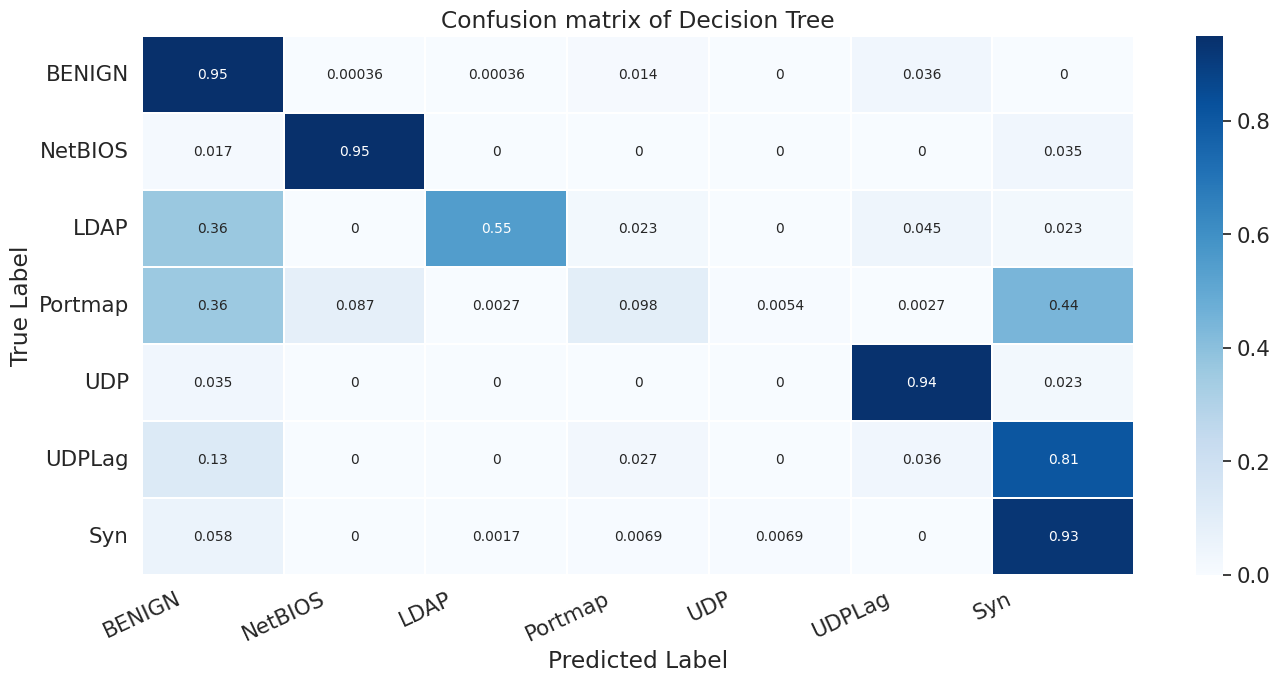

In [ ]:
# Matrix Confusion Obtained by Decision Tree

matrix = dt_conf_mat.astype('float') / dt_conf_mat.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize =(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
tick_marks = np.arange(len( class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix of Decision Tree')
plt.show()



In [ ]:
#RoC curve Function

def RoC_Curve(classifier, X_val, y_val, title):
        """ RoC Curve for Classifier
        Parameters:
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph

        Note: Some part of this Method code is taken
            from Sklearn Website
        """

        lw = 2
        n_classes = 7
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()


In [12]:
# RoC Curve
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
title = 'Receiver operating characteristic of Decision Tree'
RoC_Curve(dt, X_test_std_20, y_test_20, title)

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [ ]:

acc_score_dt = accuracy_score(y_test_20, dt_y_pred)
print("Accuracy Score for Decision Tree: \n", acc_score_dt*100)

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:

gnb = GaussianNB()
gnb.fit(X_train_std_20, y_train_20)
gnb_y_pred = gnb.predict(X_test_std_20)

In [ ]:
print("Classification Report for Naive Bayes: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(gnb_y_pred)))


In [ ]:
gnb_conf_mat = confusion_matrix(y_test_20, gnb_y_pred)
print("Naive Bayes Confusion Matrix: \n", gnb_conf_mat)


In [ ]:
# Obtain and reshape the data confusion matrix

matrix = gnb_conf_mat.astype('float') / gnb_conf_mat.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize =(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

#  Add tags to the plot
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
tick_marks = np.arange(len( class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix model in Naive Bayes')
plt.show()



In [ ]:
title = 'Receiver operating characteristic of Naive Bayes'
RoC_Curve(gnb, X_test_std_20, y_test_20, title)


In [ ]:

acc_score_gnb = accuracy_score(y_test_20, gnb_y_pred)
print("Accuracy Score for Naive: \n", acc_score_gnb*100)

In [ ]:
### 1. Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)
rf_y_pred = rf.predict(X_test_std_20)

In [ ]:

rf_y_pred

In [ ]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))



In [ ]:

rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

In [ ]:

matrix = rf_conf_mat.astype('float') / rf_conf_mat.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize =(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add tags to the plot
class_names = ['BENIGN','NetBIOS', 'LDAP', 'Portmap', 'UDP', 'UDPLag', 'Syn']
tick_marks = np.arange(len( class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()



In [ ]:

title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

In [ ]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

In [ ]:
import matplotlib.pyplot as plt

Country = ['Random_Forest','Decision Tree','Naive Bayes']
GDP_Per_Capita = [acc_score,acc_score_dt,acc_score_gnb]
plt.figure(figsize=(10,10))
New_Colors = ['green','blue','purple']
plt.bar(Country, GDP_Per_Capita, color=New_Colors)
plt.title('Decision Tree Vs Random Forest VS Naive Bayes', fontsize=14)
plt.xlabel('Modele', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()
